In [36]:
from tensorflow.keras.preprocessing import sequence
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPool1D, Dropout, SimpleRNN, LSTM, Input, Concatenate
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import sequence
import numpy as np
from tensorflow.keras.models import Model
import string
from matplotlib import pyplot as plt

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [3]:
X_train = newsgroups_train.data
y_train = newsgroups_train.target

t_X_test = newsgroups_test.data
X_test = newsgroups_test.data
y_test = newsgroups_test.target

In [4]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))

In [5]:
newsgroups_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [6]:
X_train = []
X_test = []
for i, sentence in enumerate(newsgroups_train.data):
    tmp_sentence = sentence.lower()
    tmp_sentence = tmp_sentence.replace('\n', '')
    tmp_sentence = tmp_sentence.translate(translator)
    X_train.append(tmp_sentence)
    
for i, sentence in enumerate(newsgroups_test.data):
    tmp_sentence = sentence.lower()
    tmp_sentence = tmp_sentence.replace('\n', '')
    tmp_sentence = tmp_sentence.translate(translator)
    X_test.append(tmp_sentence)
    
X_train = np.array(X_train)
X_test = np.array(X_test)

In [7]:
X_train[0]

'from  lerxst wam umd edu  where s my thing subject  what car is this  nntp posting host  rac3 wam umd eduorganization  university of maryland  college parklines  15 i was wondering if anyone out there could enlighten me on this car i sawthe other day  it was a 2 door sports car  looked to be from the late 60s early 70s  it was called a bricklin  the doors were really small  in addition the front bumper was separate from the rest of the body  this is all i know  if anyone can tellme a model name  engine specs  yearsof production  where this car is made  history  or whatever info youhave on this funky looking car  please e mail thanks   il        brought to you by your neighborhood lerxst     '

In [8]:
top_words = 20000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [9]:
X_train[0]

[15,
 4140,
 1263,
 20,
 149,
 14,
 44,
 240,
 32,
 41,
 277,
 9,
 17,
 377,
 75,
 86,
 4140,
 1263,
 421,
 95,
 3,
 3067,
 721,
 8935,
 252,
 7,
 30,
 1295,
 28,
 159,
 66,
 43,
 120,
 9926,
 61,
 16,
 17,
 277,
 7,
 89,
 253,
 11,
 30,
 5,
 38,
 1452,
 2275,
 277,
 1155,
 2,
 18,
 15,
 1,
 1309,
 12488,
 830,
 9927,
 11,
 30,
 330,
 5,
 1,
 4100,
 82,
 179,
 471,
 8,
 1327,
 1,
 843,
 8344,
 30,
 1927,
 15,
 1,
 793,
 3,
 1,
 680,
 17,
 9,
 46,
 7,
 87,
 28,
 159,
 33,
 16012,
 5,
 807,
 267,
 1048,
 3147,
 2855,
 149,
 17,
 277,
 9,
 228,
 612,
 27,
 794,
 339,
 8161,
 16,
 17,
 369,
 277,
 174,
 109,
 180,
 209,
 1689,
 1346,
 2,
 13,
 35,
 57,
 8539]

In [10]:
max_words = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_words, padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=max_words, padding='post')

In [11]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [16]:
model = Sequential()
model.add(Embedding(20000,64, input_length=100))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(MaxPool1D())
model.add(Dropout(0.3))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dense(20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 100, 128)          98816     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 50, 128)          0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50, 64)            49408     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 25, 64)           0         
 1D)                                                  

In [19]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=128, verbose=2)

Epoch 1/20
89/89 - 21s - loss: 3.7598 - accuracy: 0.0958 - val_loss: 2.4960 - val_accuracy: 0.1401 - 21s/epoch - 235ms/step
Epoch 2/20
89/89 - 21s - loss: 2.2852 - accuracy: 0.1682 - val_loss: 2.3206 - val_accuracy: 0.1841 - 21s/epoch - 233ms/step
Epoch 3/20
89/89 - 20s - loss: 66.4327 - accuracy: 0.2668 - val_loss: 19.0450 - val_accuracy: 0.0716 - 20s/epoch - 230ms/step
Epoch 4/20
89/89 - 20s - loss: 2.9141 - accuracy: 0.1848 - val_loss: 2.3258 - val_accuracy: 0.2146 - 20s/epoch - 227ms/step
Epoch 5/20
89/89 - 20s - loss: 2.1551 - accuracy: 0.2917 - val_loss: 2.1826 - val_accuracy: 0.2715 - 20s/epoch - 226ms/step
Epoch 6/20
89/89 - 20s - loss: 1.7738 - accuracy: 0.3869 - val_loss: 2.1415 - val_accuracy: 0.2532 - 20s/epoch - 230ms/step
Epoch 7/20
89/89 - 21s - loss: 1.5974 - accuracy: 0.4575 - val_loss: 1.9982 - val_accuracy: 0.3411 - 21s/epoch - 236ms/step
Epoch 8/20
89/89 - 21s - loss: 1.3270 - accuracy: 0.5430 - val_loss: 2.1045 - val_accuracy: 0.3537 - 21s/epoch - 236ms/step
Epoch 

KeyboardInterrupt: 

In [ ]:
y_pred= model.predict(X_test)

2022-09-13 14:57:12.819108: E tensorflow/stream_executor/cuda/cuda_dnn.cc:389] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2022-09-13 14:57:12.819452: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at conv_ops.cc:1134 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'sequential_2/conv1d_1/Conv1D' defined at (most recent call last):
    File "/anaconda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/anaconda/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/anaconda/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/anaconda/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/anaconda/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/anaconda/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/anaconda/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/anaconda/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/anaconda/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/anaconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/anaconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/anaconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/anaconda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/anaconda/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/anaconda/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/anaconda/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_53712/3423212136.py", line 1, in <cell line: 1>
      y_pred= model.predict(X_test)
    File "/anaconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/keras/engine/training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/anaconda/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "/anaconda/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/anaconda/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "/anaconda/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
      return self(x, training=False)
    File "/anaconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/keras/engine/sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "/anaconda/lib/python3.9/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/anaconda/lib/python3.9/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/anaconda/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_2/conv1d_1/Conv1D'
DNN library is not found.
	 [[{{node sequential_2/conv1d_1/Conv1D}}]] [Op:__inference_predict_function_122324]

In [26]:
model = Sequential()
model.add(Embedding(20000,64, input_length=100))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPool1D())
model.add(Dropout(0.3))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPool1D())
model.add(Dropout(0.3))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPool1D())
model.add(LSTM(24, activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
train = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128, verbose=2)

Epoch 1/100
89/89 - 4s - loss: 2.9822 - accuracy: 0.0679 - val_loss: 2.8968 - val_accuracy: 0.1058 - 4s/epoch - 40ms/step
Epoch 2/100
89/89 - 2s - loss: 2.4441 - accuracy: 0.1968 - val_loss: 2.1938 - val_accuracy: 0.2653 - 2s/epoch - 25ms/step
Epoch 3/100
89/89 - 2s - loss: 1.5888 - accuracy: 0.4426 - val_loss: 1.9368 - val_accuracy: 0.3826 - 2s/epoch - 26ms/step
Epoch 4/100
89/89 - 2s - loss: 1.0196 - accuracy: 0.6459 - val_loss: 1.8780 - val_accuracy: 0.4669 - 2s/epoch - 25ms/step
Epoch 5/100
89/89 - 2s - loss: 0.6297 - accuracy: 0.7873 - val_loss: 2.0224 - val_accuracy: 0.4907 - 2s/epoch - 26ms/step
Epoch 6/100
89/89 - 2s - loss: 0.3907 - accuracy: 0.8705 - val_loss: 2.3403 - val_accuracy: 0.4920 - 2s/epoch - 25ms/step
Epoch 7/100
89/89 - 2s - loss: 0.2918 - accuracy: 0.9030 - val_loss: 2.6314 - val_accuracy: 0.4892 - 2s/epoch - 25ms/step
Epoch 8/100
89/89 - 2s - loss: 0.2135 - accuracy: 0.9315 - val_loss: 2.7520 - val_accuracy: 0.4976 - 2s/epoch - 26ms/step
Epoch 9/100
89/89 - 2s -

In [28]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

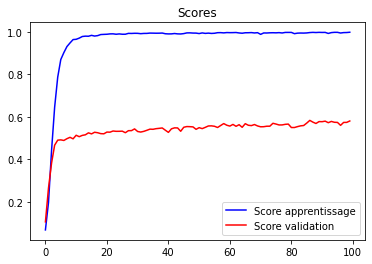

In [31]:
plot_scores(train)

In [ ]:
model = Sequential()
model.add(Embedding(20000,64, input_length=100))
model.add(Conv1D(128, 1, activation='relu'))
model.add(MaxPool1D())
model.add(Dropout(0.3))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPool1D())
model.add(Dropout(0.3))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPool1D())
model.add(LSTM(24, activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
X_train.shape

(11314, 100)

In [58]:
inp = Input(shape=(100))
emb = Embedding(20000, 64)(inp)

c1 = Conv1D(64, 1, activation='relu', padding='same')(emb)
c1 = MaxPool1D()(c1)
c1 = Conv1D(128, 1, activation='relu', padding='same')(c1)

c2 = Conv1D(64, 3, activation='relu', padding='same')(emb)
c2 = MaxPool1D()(c2)
c2 = Conv1D(128, 3, activation='relu', padding='same')(c2)

c3 = Conv1D(64, 5, activation='relu', padding='same')(emb)
c3 = MaxPool1D()(c3)
c3 = Conv1D(128, 5, activation='relu', padding='same')(c3)

c4 = Conv1D(64, 7, activation='relu', padding='same')(emb)
c4 = MaxPool1D()(c4)
c4 = Conv1D(128, 1, activation='relu', padding='same')(c4)

concat = Concatenate()([c1,c2,c3,c4])

dropout = Dropout(0.35)(concat)

flatten = Flatten()(dropout)
dense = Dense(20, activation='softmax')(flatten)

model = Model(inp,dense)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_13 (Embedding)       (None, 100, 64)      1280000     ['input_8[0][0]']                
                                                                                                  
 conv1d_42 (Conv1D)             (None, 100, 64)      4160        ['embedding_13[0][0]']           
                                                                                                  
 conv1d_44 (Conv1D)             (None, 100, 64)      12352       ['embedding_13[0][0]']           
                                                                                            

In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
train = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128, verbose=2)

Epoch 1/100
89/89 - 2s - loss: 2.8020 - accuracy: 0.1314 - val_loss: 2.2864 - val_accuracy: 0.2379 - 2s/epoch - 21ms/step
Epoch 2/100
89/89 - 1s - loss: 1.4259 - accuracy: 0.5278 - val_loss: 1.4359 - val_accuracy: 0.5250 - 917ms/epoch - 10ms/step
Epoch 3/100
89/89 - 1s - loss: 0.4689 - accuracy: 0.8588 - val_loss: 1.3036 - val_accuracy: 0.6163 - 917ms/epoch - 10ms/step
Epoch 4/100
89/89 - 1s - loss: 0.1176 - accuracy: 0.9745 - val_loss: 1.6099 - val_accuracy: 0.6082 - 926ms/epoch - 10ms/step
Epoch 5/100
89/89 - 1s - loss: 0.0375 - accuracy: 0.9943 - val_loss: 1.6437 - val_accuracy: 0.6386 - 920ms/epoch - 10ms/step
Epoch 6/100
89/89 - 1s - loss: 0.0165 - accuracy: 0.9980 - val_loss: 1.7512 - val_accuracy: 0.6395 - 934ms/epoch - 10ms/step
Epoch 7/100
89/89 - 1s - loss: 0.0125 - accuracy: 0.9985 - val_loss: 1.8888 - val_accuracy: 0.6272 - 944ms/epoch - 11ms/step
Epoch 8/100
89/89 - 1s - loss: 0.0114 - accuracy: 0.9988 - val_loss: 1.8462 - val_accuracy: 0.6414 - 951ms/epoch - 11ms/step
Epo

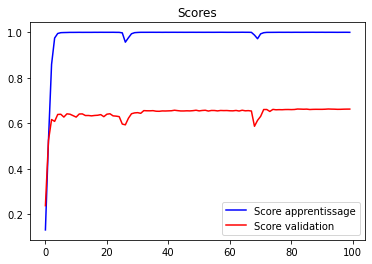

In [61]:
plot_scores(train)